In [16]:
import pandas as pd

df = pd.read_csv('../data/updated_wos/wos.complete.connected.csv')

# extract a list of years
years = df['year'].tolist()
in_degrees = df['cited_by'].tolist()

print(years)
print(in_degrees)

[2021, 2015, 2023, 2020, 2014, 2018, 2022, 2022, 2019, 2020, 2022, 2020, 2019, 2019, 2021, 2020, 2021, 2019, 2021, 2022, 2019, 2021, 2022, 2019, 2022, 2021, 2022, 2022, 2021, 2021, 2017, 2021, 2013, 2022, 2023, 2020, 2015, 2020, 2019, 2016, 2022, 2023, 2022, 2016, 2021, 2021, 2020, 2021, 2021, 2019, 2017, 2016, 2019, 2021, 2018, 2021, 2022, 2021, 2019, 2020, 2018, 2022, 2018, 2019, 2016, 2021, 2022, 2022, 2018, 2022, 2019, 2021, 2017, 2022, 2022, 2022, 2022, 2022, 2016, 2019, 2023, 2022, 2018, 2021, 2020, 2022, 2022, 2021, 2019, 2019, 2021, 2019, 2019, 2022, 2023, 2023, 2020, 2022, 2021, 2022, 2021, 2023, 2018, 2023, 2016, 2019, 2022, 2021, 2020, 2020, 2018, 2023, 2021, 2017, 2020, 2023, 2018, 2023, 2021, 2016, 2022, 2018, 2021, 2020, 2017, 2017, 2018, 2022, 2023, 2022, 2018, 2021, 2022, 2015, 2021, 2021, 2021, 2017, 2022, 2019, 2023, 2019, 2023, 2021, 2020, 2019, 2020, 2022, 2021, 2021, 2022, 2020, 2021, 2010, 2019, 2023, 2022, 2020, 2021, 2021, 2019, 2020, 2023, 2020, 2019, 2018, 201

In [17]:
def findMax(test_list):
    max = 0
    thisi = 0
    max2 = 0
    max2i = 0
    max3 = 0
    max3i = 0
    for i in range(len(test_list)):
        if test_list[i] > max:
            max3 = max2
            max3i = max2i
            max2 = max
            max2i = thisi
            max = test_list[i]
            thisi = i
    
    return [(max, i), (max2, max2i), (max3, max3i)]

In [18]:
findMax(in_degrees)

[(703, 9560), (208, 415), (187, 331)]

In [19]:
print(df.at[4950, 'paper_id'])
print(df.at[3339, 'paper_id'])
print(df.at[2587, 'paper_id'])

10.1016/j.neucom.2013.06.019
10.1002/inf2.12341
10.1039/c8fd00109j


In [20]:
def countLessThan(test_list, k):
    count = 0
    for i in test_list:
        if i < k:
            count = count + 1
    return count

In [21]:
def countGreaterThan(test_list, k):
    count = 0
    for i in test_list:
        if i > k:
            count = count + 1
    return count

1


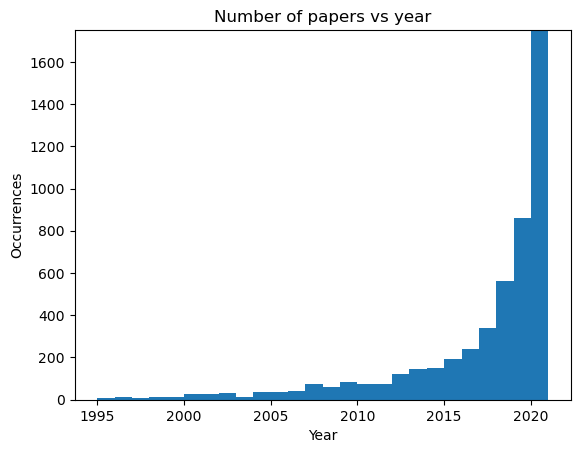

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

# binwidth = 5000
plt.hist(years, bins=np.arange(1995, 2022, 1))
plt.ylim(ymin=0, ymax = 1750)
plt.title("Number of papers vs year")
plt.xlabel("Year")
plt.ylabel("Occurrences")

print(countLessThan(years, 1990))

222


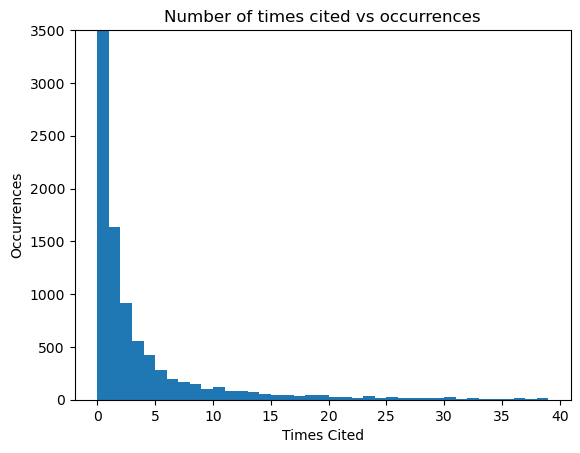

In [23]:
# binwidth = 5000
plt.hist(in_degrees, bins=np.arange(0, 40, 1))
plt.ylim(ymin=0, ymax = 3500)
plt.title("Number of times cited vs occurrences")
plt.xlabel("Times Cited")
plt.ylabel("Occurrences")

print(countGreaterThan(in_degrees, 40))

In [24]:
df = pd.read_csv('../data/updated_wos/wos.complete.connected.csv')

In [25]:
i = ['apple','red','apple','red','red','pear']
d = {x:i.count(x) for x in i}
print(d)

{'apple': 2, 'red': 3, 'pear': 1}


In [ ]:
# graphsage and node2vec

In [26]:
def findAverage(indegree_list):
    sum = 0
    for indegree in indegree_list:
        sum += indegree
    return sum / len(indegree_list)

In [27]:
year_indegree = {}

years = df['year'].tolist()
in_degrees = df['cited_by'].tolist()

for i in range(len(years)):
    if years[i] in year_indegree:
        year_indegree[years[i]] += [in_degrees[i]]
    else:
        year_indegree[years[i]] = [in_degrees[i]]

print(year_indegree[2018])

[0, 7, 18, 7, 0, 2, 1, 1, 5, 5, 5, 3, 11, 2, 0, 3, 2, 3, 1, 23, 16, 7, 2, 5, 13, 2, 7, 0, 0, 6, 1, 9, 1, 1, 2, 5, 1, 208, 4, 2, 4, 9, 1, 2, 21, 9, 12, 8, 8, 3, 2, 5, 6, 6, 7, 5, 7, 5, 1, 1, 6, 7, 1, 6, 10, 3, 5, 1, 4, 2, 3, 9, 53, 1, 13, 7, 1, 95, 4, 2, 3, 7, 30, 2, 3, 3, 56, 5, 32, 5, 19, 11, 15, 9, 9, 17, 3, 98, 3, 28, 1, 12, 10, 19, 13, 1, 8, 19, 32, 26, 42, 23, 27, 6, 16, 165, 24, 30, 4, 43, 5, 17, 19, 48, 2, 1, 2, 8, 29, 11, 30, 69, 8, 2, 7, 51, 75, 8, 52, 143, 24, 10, 27, 0, 31, 5, 19, 5, 49, 34, 224, 3, 1, 6, 16, 29, 25, 7, 14, 30, 66, 20, 45, 35, 9, 30, 1, 2, 22, 34, 68, 2, 19, 49, 0, 3, 6, 30, 10, 9, 2, 4, 23, 1, 1, 4, 144, 161, 74, 15, 7, 1, 22, 6, 59, 5, 5, 4, 60, 403, 4, 32, 64, 2, 3, 8, 7, 3, 12, 3, 1, 98, 71, 6, 18, 3, 6, 8, 8, 3, 5, 5, 49, 22, 2, 3, 5, 13, 15, 25, 4, 4, 2, 3, 3, 8, 7, 25, 26, 4, 2, 4, 13, 23, 5, 19, 3, 5, 83, 3, 2, 20, 39, 10, 7, 5, 6, 21, 5, 54, 1, 8, 25, 3, 6, 2, 56, 1, 1, 22, 12, 2, 117, 116, 3, 0, 4, 0, 2, 1, 5, 1, 14, 29, 51, 8, 7, 6, 5, 12, 17, 16,

In [33]:
complete_years = []
complete_indegrees_by_year = []
nummin = 0
for year in year_indegree:
    if (year == 0):
        continue
    if year == 1989:
        nummin = nummin +1

    complete_years += [year]
    complete_indegrees_by_year += [findAverage(year_indegree[year])]

print(nummin)
print(sorted(complete_years))
print(complete_years)
print(complete_indegrees_by_year)

1
[1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
[2021, 2015, 2023, 2020, 2014, 2018, 2022, 2019, 2017, 2013, 2016, 2010, 2012, 2024, 2009, 2000, 2011, 1999, 2008, 2007, 2004, 1993, 1990, 2002, 1997, 1998, 2005, 2001, 1994, 2006, 2003, 1995, 1989, 1996, 1991, 1992]
[3.4548517520215634, 9.561855670103093, 0.30542168674698794, 6.799173553719008, 12.181208053691275, 13.55258467023173, 1.5771015987622485, 8.85813953488372, 10.100294985250738, 14.6875, 12.343096234309623, 20.842105263157894, 6.666666666666667, 0.1111111111111111, 10.963414634146341, 4.8076923076923075, 8.10958904109589, 18.066666666666666, 6.983606557377049, 9.693333333333333, 14.64864864864865, 3.6666666666666665, 4.5, 16.676470588235293, 87.11111111111111, 4.538461538461538, 6.756756756756757, 11.0, 1.8333333333333333, 9.41025641025641, 4.083333333333333,

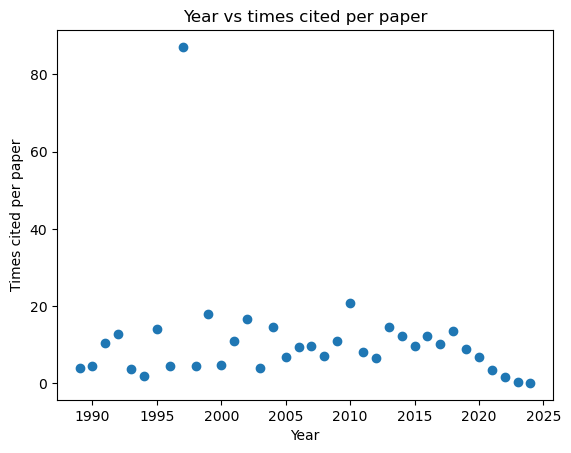

In [31]:
plt.scatter(complete_years, complete_indegrees_by_year)  # Plot the chart 
plt.title("Year vs times cited per paper")
plt.xlabel("Year")
plt.ylabel("Times cited per paper")
plt.show()  # display 

In [34]:
years = df['year'].tolist()

for i in range(len(years)):
    if (years[i] == 1997):
        print(df.at[i, 'paper_id'])

10.1016/S0893-6080(97)00011-7
10.1162/neco.1997.9.2.279
10.1109/10.568916
10.1023/A:1008240229616
10.1088/0954-898X/8/4/002
10.1016/S0925-2312(96)00034-3
10.1088/0954-898X/8/4/003
10.1016/S0304-3940(97)00612-5
10.1016/S0168-9002(97)00140-X
